In [172]:
# Import required libraries
import pandas as pd # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt # Visualizations
import seaborn as sns # Visualizations
%matplotlib inline

In [176]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [177]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [178]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [180]:
## drop day, month, year
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [181]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [182]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [183]:
#  encode fire as 1 and not fire as 0
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [187]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [188]:
df['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [189]:
## Independent And dependent features
X=df.drop('FWI',axis=1)
y=df['FWI']

In [190]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [191]:
y

,FWI
0,0.5
1,0.4
2,0.1
3,0.0
4,0.5
...,...
238,6.5
239,0.0
240,0.2
241,0.7


In [192]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)   #random_state ensure same split every time


In [193]:

X_train.shape,X_test.shape

((182, 11), (61, 11))

In [194]:
## Feature Selection based on correlaltion
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.620929,-0.271423,-0.307315,0.643923,0.491119,0.361489,0.577606,0.457320,0.512162,0.278739
RH,-0.620929,1.000000,0.181966,0.221883,-0.622897,-0.373911,-0.190387,-0.662801,-0.316040,-0.395287,-0.412307
Ws,-0.271423,0.181966,1.000000,0.195423,-0.107585,0.037273,0.122497,0.076060,0.069537,-0.037045,-0.226819
Rain,-0.307315,0.221883,0.195423,1.000000,-0.544467,-0.304522,-0.315069,-0.355279,-0.314369,-0.415752,-0.042312
FFMC,0.643923,-0.622897,-0.107585,-0.544467,1.000000,0.623587,0.523127,0.742285,0.605418,0.783103,0.242648
DMC,0.491119,-0.373911,0.037273,-0.304522,0.623587,1.000000,0.876578,0.684122,0.983270,0.625013,0.174263
DC,0.361489,-0.190387,0.122497,-0.315069,0.523127,0.876578,1.000000,0.513990,0.947854,0.560104,-0.096635
ISI,0.577606,-0.662801,0.076060,-0.355279,0.742285,0.684122,0.513990,1.000000,0.639526,0.729911,0.284786
BUI,0.457320,-0.316040,0.069537,-0.314369,0.605418,0.983270,0.947854,0.639526,1.000000,0.618355,0.073493
Classes,0.512162,-0.395287,-0.037045,-0.415752,0.783103,0.625013,0.560104,0.729911,0.618355,1.000000,0.209863


<Axes: >

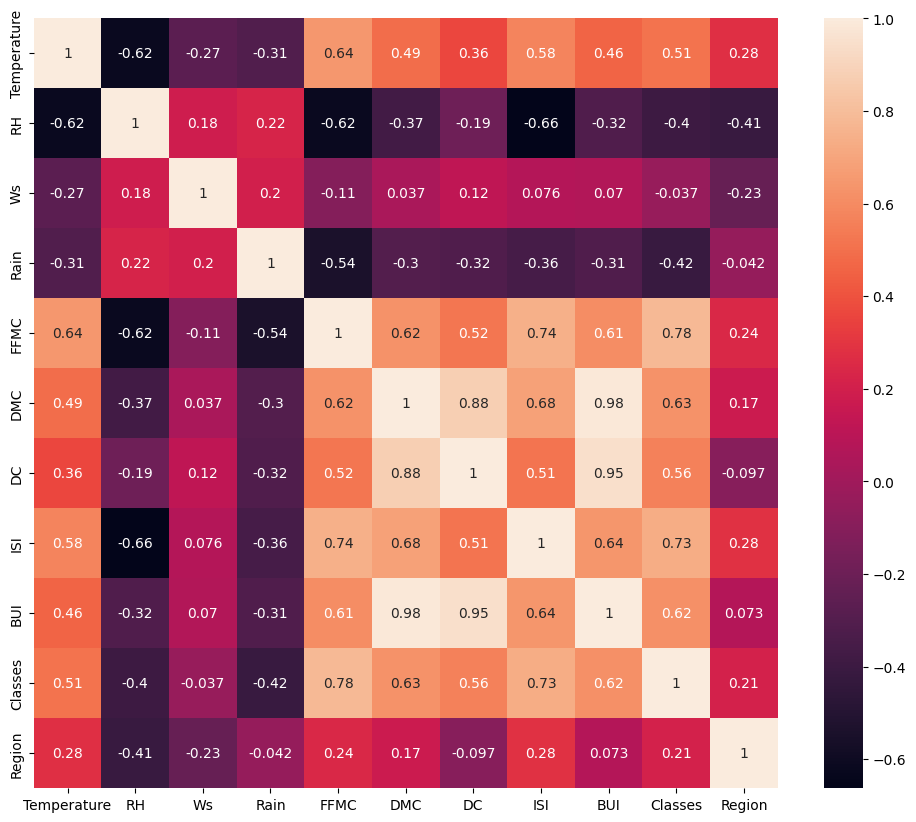

In [195]:

## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [197]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [199]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [200]:
## drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### Feature Scaling Or Standardization





In [201]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## Box Plots To understand Effect Of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

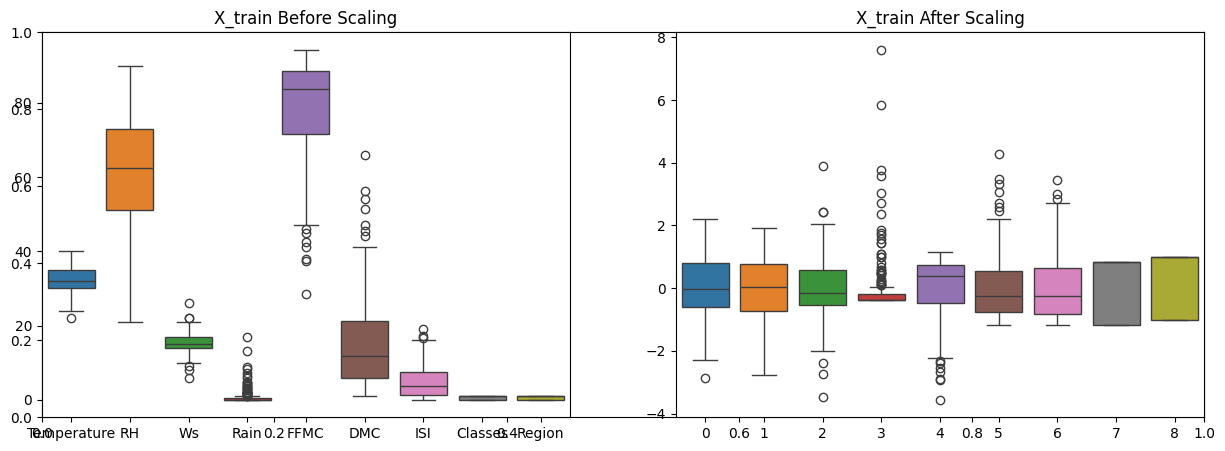

In [202]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression Model

In [203]:
# Implement simple linear regression
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train)

LinearRegression()

In [204]:
y_pred = lin_reg_model.predict(X_test_scaled)

In [205]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)

In [206]:
# R2 score metrics
from sklearn.metrics import r2_score

# calculate score
score = r2_score(y_test,y_pred)


Mean absolute error 0.6740104768855226
R2 Score 0.9840540762337815


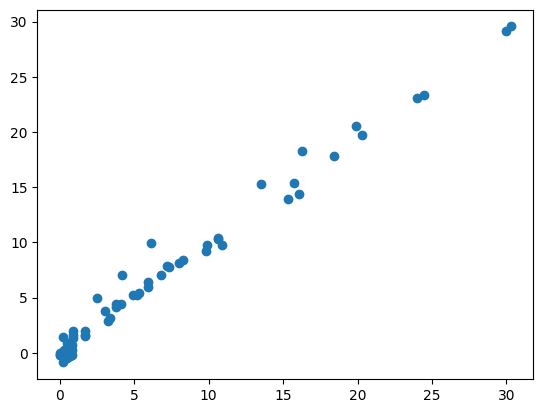

In [208]:
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Lasso Regression

Mean absolute error 1.3231024563212943
R2 Score 0.9508643136202581


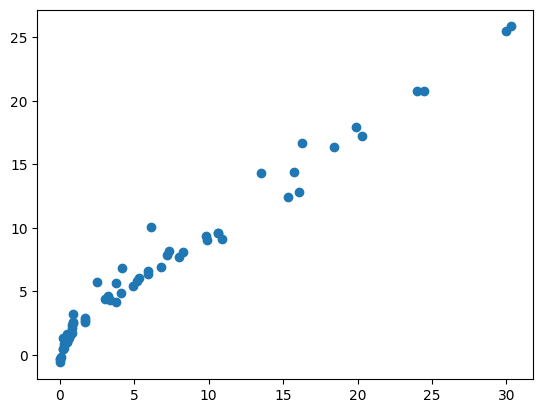

In [209]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred=lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

# Cross Validation Lasso

In [210]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [211]:

lassocv.alpha_

np.float64(0.0383414997377244)

In [212]:
lassocv.alphas_

array([6.70028597, 6.24870912, 5.82756704, 5.43480852, 5.06852062,
       4.72691929, 4.40834075, 4.11123334, 3.83414997, 3.5757411 ,
       3.33474812, 3.10999725, 2.90039385, 2.70491701, 2.52261466,
       2.35259887, 2.19404158, 2.04617052, 1.90826548, 1.77965477,
       1.659712  , 1.54785296, 1.44353285, 1.34624357, 1.25551126,
       1.170894  , 1.09197967, 1.01838389, 0.94974822, 0.88573837,
       0.82604257, 0.77037007, 0.7184497 , 0.6700286 , 0.62487091,
       0.5827567 , 0.54348085, 0.50685206, 0.47269193, 0.44083408,
       0.41112333, 0.383415  , 0.35757411, 0.33347481, 0.31099973,
       0.29003938, 0.2704917 , 0.25226147, 0.23525989, 0.21940416,
       0.20461705, 0.19082655, 0.17796548, 0.1659712 , 0.1547853 ,
       0.14435329, 0.13462436, 0.12555113, 0.1170894 , 0.10919797,
       0.10183839, 0.09497482, 0.08857384, 0.08260426, 0.07703701,
       0.07184497, 0.06700286, 0.06248709, 0.05827567, 0.05434809,
       0.05068521, 0.04726919, 0.04408341, 0.04111233, 0.03834

In [213]:
lassocv.mse_path_

array([[56.24708452, 48.19203683, 46.70768585, 56.53136939, 56.66442802],
       [50.65994071, 43.40830572, 40.87377408, 53.12129098, 51.4436176 ],
       [45.73469354, 39.20309674, 35.52672475, 46.5279477 , 46.09462881],
       [40.82236708, 34.82168881, 30.81670246, 40.35359471, 40.65295732],
       [36.0458914 , 30.71489242, 26.77897434, 35.00457351, 35.79514607],
       [31.86762601, 27.12441316, 23.32177249, 30.37182519, 31.55098118],
       [28.2111556 , 23.98411045, 20.36610933, 26.36060128, 27.84168772],
       [25.00978314, 21.23624414, 17.84306077, 22.88899253, 24.5985951 ],
       [22.20612974, 18.83136185, 15.6930677 , 19.88542777, 21.76253206],
       [19.74946284, 16.72553392, 13.86432745, 17.28787459, 19.28132122],
       [17.5958131 , 14.880764  , 12.31263087, 15.042322  , 17.10972309],
       [15.7068557 , 13.26394056, 10.9990803 , 13.10225879, 15.20832471],
       [14.04918058, 11.8462048 ,  9.89022811, 11.42689054, 13.54257141],
       [12.59340961, 10.60240076,  8.9

Mean absolute error 0.7204939069953782
R2 Score 0.9828532604384133


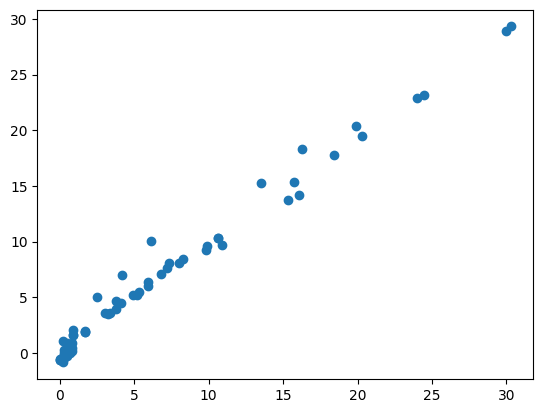

In [214]:
y_pred=lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

# Ridge Regression model

Mean absolute error 0.6958390999989531
R2 Score 0.9836316111671296


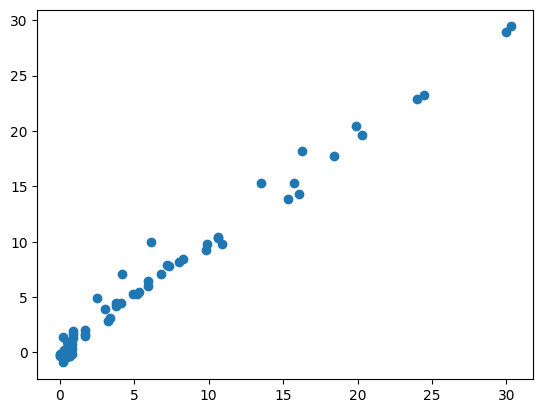

In [215]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.6958390999989531
R2 Score 0.9836316111671296


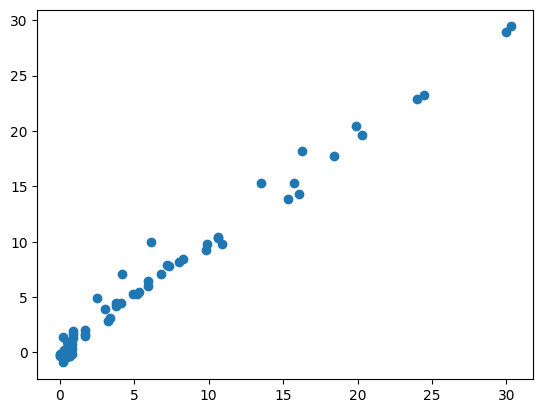

In [216]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [217]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

# Elasticnet Regression

Mean absolute error 1.9072342624620537
R2 Score 0.8912817791829821


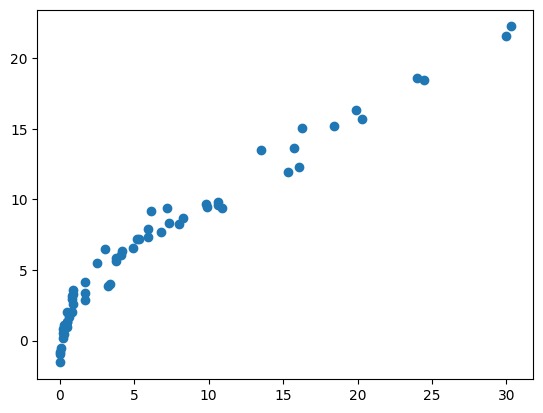

In [218]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.7341884119415886
R2 Score 0.9827054499337484


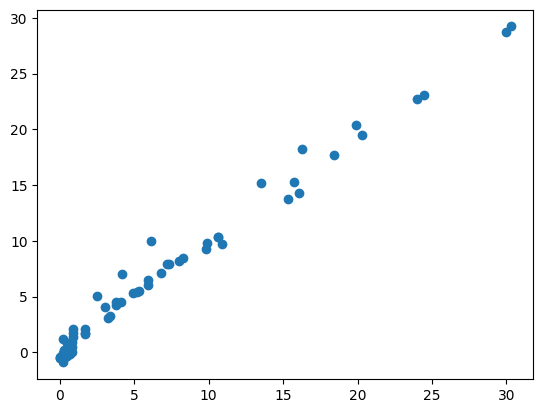

In [219]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [220]:
elasticcv.alphas_

array([13.40057194, 12.49741824, 11.65513408, 10.86961705, 10.13704124,
        9.45383859,  8.81668151,  8.22246668,  7.66829995,  7.1514822 ,
        6.66949623,  6.21999451,  5.8007877 ,  5.40983402,  5.04522931,
        4.70519774,  4.38808316,  4.09234104,  3.81653095,  3.55930954,
        3.31942399,  3.09570592,  2.8870657 ,  2.69248714,  2.51102252,
        2.341788  ,  2.18395933,  2.03676778,  1.89949645,  1.77147675,
        1.65208514,  1.54074013,  1.4368994 ,  1.34005719,  1.24974182,
        1.16551341,  1.0869617 ,  1.01370412,  0.94538386,  0.88166815,
        0.82224667,  0.76682999,  0.71514822,  0.66694962,  0.62199945,
        0.58007877,  0.5409834 ,  0.50452293,  0.47051977,  0.43880832,
        0.4092341 ,  0.3816531 ,  0.35593095,  0.3319424 ,  0.30957059,
        0.28870657,  0.26924871,  0.25110225,  0.2341788 ,  0.21839593,
        0.20367678,  0.18994964,  0.17714767,  0.16520851,  0.15407401,
        0.14368994,  0.13400572,  0.12497418,  0.11655134,  0.10

In [221]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}

# Regularized Regression Methods: Ridge, Lasso, and Elastic Net

---

## 🔹 Ridge Regression
**Use it when:**
- You have many features.  
- Some features are not very useful, but you don’t want to throw them away.  
- Ridge **shrinks their effect** (makes weights smaller) but keeps all features in the model.  

**Think of it as:**  
> “I’ll use everything, but I’ll calm down the noisy ones.”

---

## 🔹 Lasso Regression
**Use it when:**
- You want the model to be simpler and only keep the most important features.  
- Lasso can **make some feature weights zero**, effectively removing those features.  

**Think of it as:**  
> “I’ll pick only the features that matter and ignore the rest.”

---

## 🔹 Elastic Net
**Use it when:**
- You want a **balance between Ridge and Lasso**.  
- Useful if you have lots of features, some strongly related to each other, and some useless.  
- Elastic Net **both shrinks and selects features**.  

**Think of it as:**  
> “I’ll calm down the noisy ones, but also drop the truly useless ones.”

---

## ✅ Quick Everyday Analogy
- **Ridge** = keep all your clothes, but fold them neatly so the closet isn’t messy.  
- **Lasso** = throw away the clothes you never wear.  
- **Elastic Net** = do both: fold some, throw some.  

---

## 🔹 RidgeCV, LassoCV, ElasticNetCV
- **RidgeCV** → Ridge + Cross-Validation (finds best shrink strength)  
- **LassoCV** → Lasso + CV (finds best shrink strength while possibly dropping useless features)  
- **ElasticNetCV** → Elastic Net + CV (finds best shrink + best mix of Ridge/Lasso)  

---

### Example: 3-fold CV with 2 candidate alpha values

**Candidate alphas:** `[0.1, 1.0]`

**For alpha = 0.1**  
- Fold 1 → accuracy = 80%  
- Fold 2 → accuracy = 82%  
- Fold 3 → accuracy = 79%  
- **Average = 80.3%**

**For alpha = 1.0**  
- Fold 1 → accuracy = 85%  
- Fold 2 → accuracy = 83%  
- Fold 3 → accuracy = 84%  
- **Average = 84%**

**👉 Cross-validation will select alpha = 1.0**  
> because it had the best average across folds.  
